In [2]:
import subprocess
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
working_dir = '/home/atimms/ngs_data/misc/cherry_sc_org_project_20/cherry_gwas_peaks_1220'
os.chdir(working_dir)

In [ ]:
##load data and format
c_bed = 'combined_regions.bed'
c_data = pd.read_table(c_bed, header=None)
##add header
c_data.columns=["chr", "start", "end", "snp_count", "region"]
##add 2 new columns
c_data['size'] = c_data.end - c_data.start
c_data['study'] = c_data['region'].str.split("_").str[0]
c_data.head()


In [ ]:
# ax = sns.boxplot(x="study", y="snp_count", data=c_data)
# ax.set_yscale("log")
ax = sns.boxplot(x="study", y="size", data=c_data)
ax.set_yscale("log")

In [ ]:
fig, ax=plt.subplots(1,2)

sns.boxplot(x="study", y="snp_count", data=c_data, ax=ax[0])
plt.xticks(rotation=45)
sns.boxplot(x="study", y="size", data=c_data, ax=ax[1])
plt.xticks(rotation=45)
#ax[0].set_yscale("log")
#ax[1].set_yscale("log")

In [ ]:
sns.boxplot(x="study", y="size", data=c_data)
plt.xticks(rotation=45)

In [ ]:
int_file = 'combined_regions.summit_peaks.bt_int.bed'
int_data = pd.read_table(int_file, header=None)
##add header
int_data.columns=["chr", "start", "end", "snp_count", "region", "filename", "peak_count"]
##add 3 new columns
##split filename to just peak names
int_data['cc_peaks'] = int_data['filename'].str.split("/").str[-1].str.rsplit(".",3).str[0]

##normalize peak count
int_data['cc_peaks_snp_count'] = int_data.peak_count / int_data.snp_count
int_data['cc_peaks_length'] = int_data.peak_count / (int_data.end - int_data.start)

int_data.head()

In [ ]:
##split data
int_file = 'combined_regions.summit_peaks.bt_int.bed'
int_data = pd.read_table(int_file, header=None)
##add header
int_data.columns=["chr", "start", "end", "snp_count", "region", "filename", "peak_count"]
##add 4 new columns
##split filename to just peak names
int_data['cc_peaks'] = int_data['filename'].str.split("/").str[-1].str.rsplit(".",3).str[0]
int_data['study'] = int_data['region'].str.split("_").str[0]
##normalize peak count
int_data['cc_peaks_snp_count'] = int_data.peak_count / int_data.snp_count
int_data['cc_peaks_length'] = int_data.peak_count / (int_data.end - int_data.start)
int_data.head()

In [ ]:
split_data = int_data[int_data['study'] == 'euro']
##split peak count column every 31st col i.e. how many peak beds
row_names = split_data.region.unique()
col_names = split_data.cc_peaks.unique()
df_for_hm = pd.DataFrame(split_data.peak_count.values.reshape(-1, 31))
df_for_hm.columns = col_names
df_for_hm['region'] = row_names
df_for_hm.head()
df_for_hm = df_for_hm.set_index('region')
df_for_hm.head()
plt.figure(figsize=(16,9))
sns.heatmap(df_for_hm)

In [ ]:
int_data['study'].unique()

In [ ]:
##split peak count column every 54th col i.e. how many peak beds
row_names = int_data.region.unique()
col_names = int_data.cc_peaks.unique()
df_for_hm = pd.DataFrame(int_data.peak_count.values.reshape(-1, 54))
df_for_hm.columns=col_names
df_for_hm['region'] = row_names
df_for_hm = df_for_hm.set_index('region')
df_for_hm.head()

df_for_hm2 = pd.DataFrame(int_data.cc_peaks_snp_count.values.reshape(-1, 54))
df_for_hm2.columns=col_names
df_for_hm2['region'] = row_names
df_for_hm2 = df_for_hm2.set_index('region')
df_for_hm2.head()

df_for_hm3 = pd.DataFrame(int_data.cc_peaks_length.values.reshape(-1, 54))
df_for_hm3.columns=col_names
df_for_hm3['region'] = row_names
df_for_hm3 = df_for_hm3.set_index('region')
df_for_hm3.head()

In [ ]:
plt.figure(figsize=(16,9))
sns.heatmap(df_for_hm)

In [ ]:
df_for_hm.tail()

In [ ]:
working_dir = '/active/cherry_t/OrgManuscript_SingleCell_Data/human_scATAC/archr_analysis/all_third'
os.chdir(working_dir)


In [ ]:
heatmap_matrix = 'heatmap_cell_class_marker_peaks.matrix.csv'
heatmap_matrix_ts = 'heatmap_cell_class_marker_peaks.matrix.transposed.csv'
data = pd.read_csv(heatmap_matrix, index_col=0)
ts_data = data.transpose()
ts_data.to_csv(heatmap_matrix_ts, sep='\t')

In [ ]:
int_file = 'combined_snps.extended_peaks.counts_for_heatmap.txt'
int_data = pd.read_table(int_file, index_col = 0)
int_data

In [ ]:
# plt.figure(figsize=(15,50))
sns.heatmap(int_data, yticklabels = 1)
#sns.clustermap(int_data, yticklabels = 1)

In [12]:
working_dir = '/home/atimms/ngs_data/misc/cherry_cadd_dSVM_comparison_1120'
os.chdir(working_dir)
int_file = 'leah_dsvm_simplified.cadd.txt'
int_data = pd.read_table(int_file)
int_data
int_file2 = 'scrambled_dsvm.cadd.txt'
int_data2 = pd.read_table(int_file)
int_data

/home/atimms/programs/miniconda3/envs/pd_np_plt_etc/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3338: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


,chr,pos,ref,alt,dvsm,cadd_raw,cadd_phred
0,1,100038285,C,A,-0.42997,2.301085,21.600
1,1,100038286,C,A,0.27241,1.284585,14.280
2,1,100038289,G,A,-1.66661,1.080610,12.580
3,1,100038292,G,A,-1.97736,1.158211,13.300
4,1,100038294,T,A,-3.73783,2.741032,22.900
...,...,...,...,...,...,...,...
19295296,Y,387211,A,G,-0.12304,0.526687,6.781
19295297,Y,387213,C,G,0.39519,-0.022991,1.198
19295298,Y,387215,A,G,1.78730,0.444690,5.916
19295299,Y,387218,A,G,0.35174,0.403864,5.469


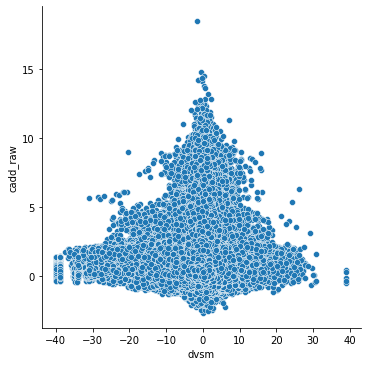

In [14]:
sns.relplot(x="dvsm", y="cadd_raw", data=int_data);

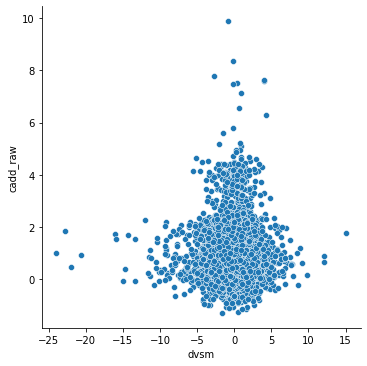

In [16]:
randsample = int_data.sample(n=10000)
sns.relplot(x="dvsm", y="cadd_raw", data=randsample);

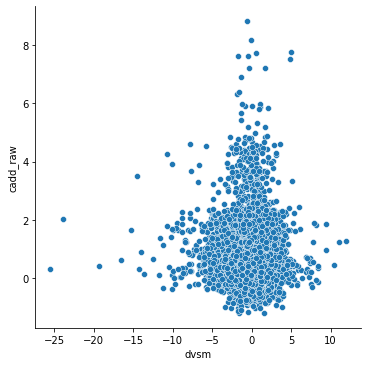

In [17]:
randsample = int_data2.sample(n=10000)
sns.relplot(x="dvsm", y="cadd_raw", data=randsample);